In [1]:
import draw2Svg as dw

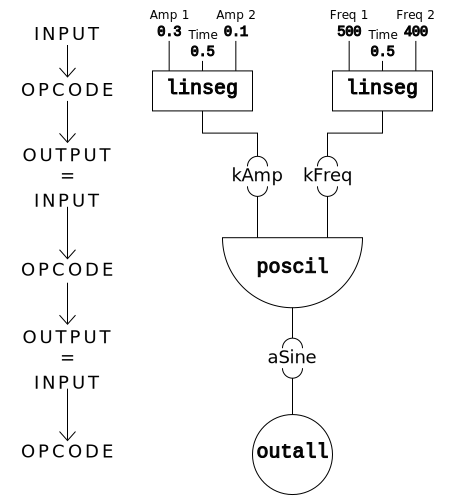

In [14]:
def vert_arrow(x,y1,y2,w=8):
    p = dw.Path(stroke='black',fill='none')
    p.M(x,y1)
    p.V(y2)
    p.M(x-w,y2-w)
    p.L(x,y2+1)
    p.L(x+w,y2-w)
    return p

def osc(x_mid,y_mid,r=70,text='poscil',textsize=20):
    y_top = y_mid-r/2
    d.append(dw.Pie(x_osc_middle,y_top,r,0,180,fill='none',stroke='black'))
    d.append(dw.Text(text,textsize,x_mid,y_mid,
                 text_anchor='middle',style='font-family: courier',stroke='black'))
    x_in_left = x_mid-r/2
    x_in_right = x_mid+r/2
    y_out = y_mid+r/2
    return ((x_in_left,y_top),(x_in_right,y_top),(x_mid,y_out))

def linseg(x_mid,y_mid,w=100,h=40,text='linseg',textsize=20):
    y_top = y_mid-h/2
    d.append(dw.Rectangle(x_mid-w/2,y_top,w,h,stroke='black',fill='none'))
    d.append(dw.Text(text,textsize,x_mid,y_mid-textsize/4,valign='middle',
                 text_anchor='middle',style='font-family: courier',stroke='black'))
    y_out = y_mid+h/2
    x_in_left = x_mid-w/3
    x_in_right = x_mid+w/3
    return ((x_in_left,y_top),(x_mid,y_top),(x_in_right,y_top),(x_mid,y_out))

def outall(x_mid,y_mid,r=40,text='outall',textsize=20):
    d.append(dw.Circle(x_mid,y_mid,r,stroke='black',fill='none'))
    d.append(dw.Text(text,textsize,x_mid,y_mid-textsize/4,text_anchor='middle',
                     valign='middle',style='font-family: courier',stroke='black'))
    return (x_mid,y_mid-r)

def input(x,y,len=10):
    d.append(dw.Line(x,y,x,y-len,stroke='black'))
    return(x,y-len)

def connect(x1,y1,x2,y2,from_top=0.4):
    """x1,y1 is on top"""
    y_dist = y2-y1
    y_mid = y1 + y_dist*from_top
    p = dw.Path(stroke='black',fill='none')
    p.M(x1,y1)
    p.V(y_mid)
    p.H(x2)
    p.L(x2,y2)
    d.append(p)
    return y_mid

def connect2var(x1,y1,x2,y2,sweep=1,from_top=0.4,arcrad=10):
    """connects to or from a variable name
    x1,y1 is on top"""
    y_dist = y2-y1
    if sweep==1: y2_line = y2-arcrad
    else: y2_line = y2+arcrad
    y_mid = y1 + y_dist*from_top
    p = dw.Path(stroke='black',fill='none')
    p.M(x1,y1)
    p.V(y_mid)
    p.H(x2)
    p.L(x2,y2_line)
    p.M(x2-arcrad,y2)
    p.A(arcrad,arcrad,0,0,sweep,x2+arcrad,y2)
    d.append(p)
    return y_mid

wdth,hght = 450,500
d = dw.Drawing(wdth,hght)

x_osc_middle = wdth*.65
x_linseg_left_middle = wdth*.45
x_linseg_right_middle = wdth*.85


# text left
x_inout_mid = wdth*.15
y_input_1 = 20
y_opcode_1 = hght*2/11
y_output_1 = hght*3/11
y_input_2 = hght*4/11
y_opcode_2 = hght*6/11
y_output_2 = hght*7/11
y_input_3 = hght*8/11
y_opcode_3 = hght*10/11
fontsize_left = 18
text_left = dw.Group(letter_spacing=3,text_anchor='middle',valign='middle')
text_left.append(dw.Text('INPUT',fontsize_left,x_inout_mid,y_input_1+20))
text_left.append(dw.Text('OPCODE',fontsize_left,x_inout_mid,y_opcode_1+5))
text_left.append(dw.Text('OUTPUT',fontsize_left,x_inout_mid,y_output_1+25))
text_left.append(dw.Text('=',fontsize_left,x_inout_mid,y_output_1+45))
text_left.append(dw.Text('INPUT',fontsize_left,x_inout_mid,y_input_2+25))
text_left.append(dw.Text('OPCODE',fontsize_left,x_inout_mid,y_opcode_2+3))
text_left.append(dw.Text('OUTPUT',fontsize_left,x_inout_mid,y_output_2+25))
text_left.append(dw.Text('=',fontsize_left,x_inout_mid,y_output_2+45))
text_left.append(dw.Text('INPUT',fontsize_left,x_inout_mid,y_input_3+25))
text_left.append(dw.Text('OPCODE',fontsize_left,x_inout_mid,y_opcode_3+3))
d.append(text_left)

# markers left
d.append(vert_arrow(x_inout_mid,y_input_1+25,y_opcode_1-15))
d.append(vert_arrow(x_inout_mid,y_opcode_1+10,y_output_1+5))
d.append(vert_arrow(x_inout_mid,y_input_2+25,y_opcode_2-15))
d.append(vert_arrow(x_inout_mid,y_opcode_2+10,y_output_2+5))
d.append(vert_arrow(x_inout_mid,y_input_3+25,y_opcode_3-15))

# opcodes
y_linseg = y_opcode_1
y_osc = y_opcode_2
y_outall = y_opcode_3
linseg_left_in_1,linseg_left_in_2,linseg_left_in_3,linseg_left_out = linseg(x_linseg_left_middle,y_linseg)
linseg_right_in_1,linseg_right_in_2,linseg_right_in_3,linseg_right_out = linseg(x_linseg_right_middle,y_linseg)
osc_in_1,osc_in_2,osc_out = osc(x_osc_middle,y_osc)
outall_in = outall(x_osc_middle,y_outall)

# variable names
y_variable_1 = y_output_1+45 
y_variable_2 = y_output_2+45 
d.append(dw.Text('kAmp',18,osc_in_1[0],y_variable_1,
                 font_style='italic',text_anchor='middle'))
d.append(dw.Text('kFreq',18,osc_in_2[0],y_variable_1,
                 font_style='italic',text_anchor='middle'))
d.append(dw.Text('aSine',18,x_osc_middle,y_variable_2,
                 font_style='italic',text_anchor='middle'))

# connectors
connect2var(*linseg_left_out,osc_in_1[0],y_variable_1-15)
connect2var(*osc_in_1,osc_in_1[0],y_variable_1+5,0)
connect2var(*linseg_right_out,osc_in_2[0],y_variable_1-15)
connect2var(*osc_in_2,osc_in_2[0],y_variable_1+5,0)
connect2var(*osc_out,x_osc_middle,y_variable_2-15)
connect2var(*outall_in,x_osc_middle,y_variable_2+5,0)

# linseg left inputs
x,y = input(*linseg_left_in_1,30)
d.append(dw.Text('0.3',14,x,y-5,text_anchor='middle',style='font-family: courier',stroke='black'))
d.append(dw.Text('Amp 1',12,x,y-22,text_anchor='middle'))
x,y = input(*linseg_left_in_3,30)
d.append(dw.Text('0.1',14,x,y-5,text_anchor='middle',style='font-family: courier',stroke='black'))
d.append(dw.Text('Amp 2',12,x,y-22,text_anchor='middle'))
x,y = input(*linseg_left_in_2)
d.append(dw.Text('0.5',14,x,y-5,text_anchor='middle',style='font-family: courier',stroke='black'))
d.append(dw.Text('Time',12,x,y-22,text_anchor='middle'))

# linseg right inputs
x,y = input(*linseg_right_in_1,30)
d.append(dw.Text('500',14,x,y-5,text_anchor='middle',style='font-family: courier',stroke='black'))
d.append(dw.Text('Freq 1',12,x,y-22,text_anchor='middle'))
x,y = input(*linseg_right_in_3,30)
d.append(dw.Text('400',14,x,y-5,text_anchor='middle',style='font-family: courier',stroke='black'))
d.append(dw.Text('Freq 2',12,x,y-22,text_anchor='middle'))
x,y = input(*linseg_right_in_2)
d.append(dw.Text('0.5',14,x,y-5,text_anchor='middle',style='font-family: courier',stroke='black'))
d.append(dw.Text('Time',12,x,y-22,text_anchor='middle'))

#d.setPixelScale(1.5)
#d.saveSvg('../../images/01-GS-01-a.svg')
d.savePng('../../images/01-GS-03-b.png')
d